In [1]:
%%javascript
console.log(_mgr)


<IPython.core.display.Javascript object>

In [2]:
%%javascript

function makeCommTarget(comm, msg) {
  console.log(msg.content.data)
  comm.onMsg = (msg) => console.log(msg.content.data)
  comm.onClose = (msg) => console.log(msg.content.data)
  // comm.send({'foo': 0});
}

_mgr.widgetManager.manager.kernel.removeCommTarget('my_comm_target', makeCommTarget)
_mgr.widgetManager.manager.kernel.registerCommTarget('my_comm_target', makeCommTarget)

<IPython.core.display.Javascript object>

In [3]:
from ipykernel.comm import Comm

my_comm = Comm(target_name='my_comm_target', data={'foo': 1}) # there is a JS exception here, but it seems not to matter

In [4]:
my_comm.send({'foo': 2})

'asdf'

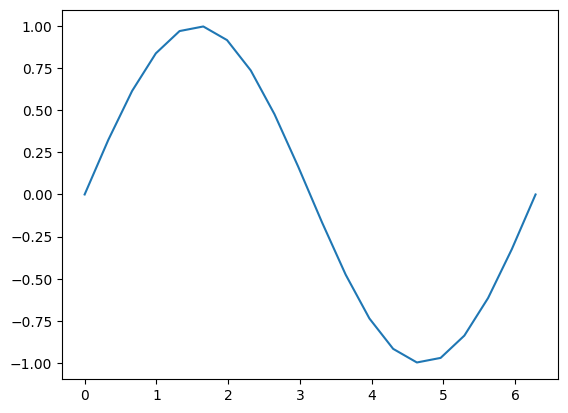

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use("nbAgg") # Have to first change to a different backend in order to get the classes to reload on the next line.
# mpl.use("module://ipympl.backend_nbagg")
# mpl.use("module://" + __name__)

fig, ax = plt.subplots()
xs = np.linspace(0, 2 * np.pi, 20)
ys = np.sin(xs)
ax.plot(xs, ys)
"asdf"


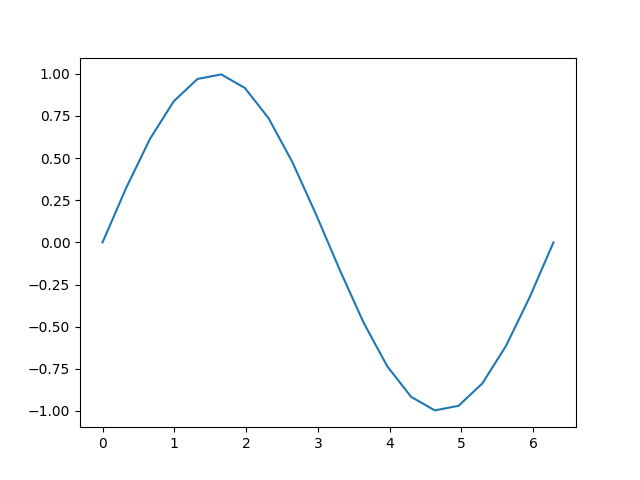

In [14]:
import io
import base64

# fig.suptitle(None)

class SNP():
  def __init__(self, figure):
    self.figure = figure

  def _repr_html_(self):
    # ripped the below from ipympl/backend_nbagg.py
    buf = io.BytesIO()
    self.figure.savefig(buf, format='png', dpi='figure')
    base64_image = base64.b64encode(buf.getvalue()).decode('utf-8')
    data_url = f'data:image/png;base64,{base64_image}'

    width_px  = self.figure.get_figwidth() * self.figure.get_dpi()
    # height_px = self.figure.get_figheight() * self.figure.get_dpi()

    return """
      <img src='{}' width={}/>
    """.format(data_url, width_px)
    # return "<b id='asdf'>bold</b><script>console.log(IPython.notebook.notebook_name); console.log(Jupyter.notebook.get_cells()); document.querySelector('#asdf').innerHTML = '' + Jupyter.notebook.get_cells();</script>"
    # return { "text/html": "<b><script>alert('hi');</script>bold</b>" }

SNP(fig)